# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
df = pd.read_csv('credit_card_fraud_10k.csv')

In [3]:
df.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


# EDA

In [4]:
# Getting shape of the data
df.shape

(10000, 10)

In [5]:
# Checking NULL value
df.isnull().sum()

transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardholder_age         0
is_fraud               0
dtype: int64

In [6]:
# Checking duplicates value
df.duplicated().sum()

np.int64(0)

In [7]:
# Getting info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


In [8]:
# Describe the data
df.describe()

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,175.949849,11.593300,0.097800,0.085700,61.798900,2.008900,43.468700,0.015100
std,2886.89568,175.392827,6.922708,0.297059,0.279935,21.487053,1.432559,14.979147,0.121957
min,1.00000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,18.000000,0.000000
25%,2500.75000,50.905000,6.000000,0.000000,0.000000,43.000000,1.000000,30.000000,0.000000
50%,5000.50000,122.095000,12.000000,0.000000,0.000000,62.000000,2.000000,44.000000,0.000000
75%,7500.25000,242.480000,18.000000,0.000000,0.000000,80.000000,3.000000,56.000000,0.000000
max,10000.00000,1471.040000,23.000000,1.000000,1.000000,99.000000,9.000000,69.000000,1.000000


In [9]:
# Drop "transaction_id"
df = df.drop(columns='transaction_id',axis=1)

In [10]:
df.head()

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,84.47,22,Electronics,0,0,66,3,40,0
1,541.82,3,Travel,1,0,87,1,64,0
2,237.01,17,Grocery,0,0,49,1,61,0
3,164.33,4,Grocery,0,1,72,3,34,0
4,30.53,15,Food,0,0,79,0,44,0


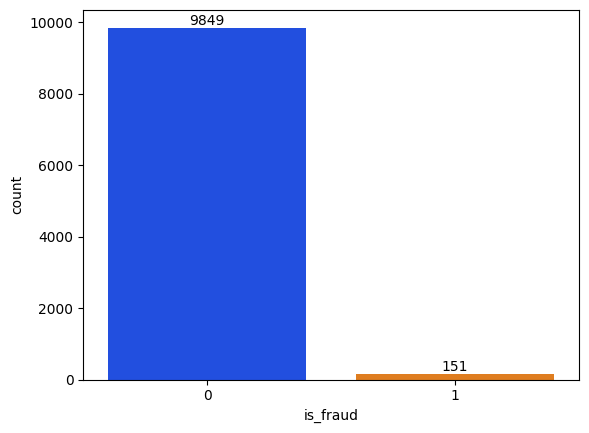

In [11]:
# Plot a count plot to show the number of fraud and non-fraud transactions
ax = sns.countplot(x=df['is_fraud'],palette="bright")

for container in ax.containers:
    ax.bar_label(container)

<Axes: xlabel='amount', ylabel='Count'>

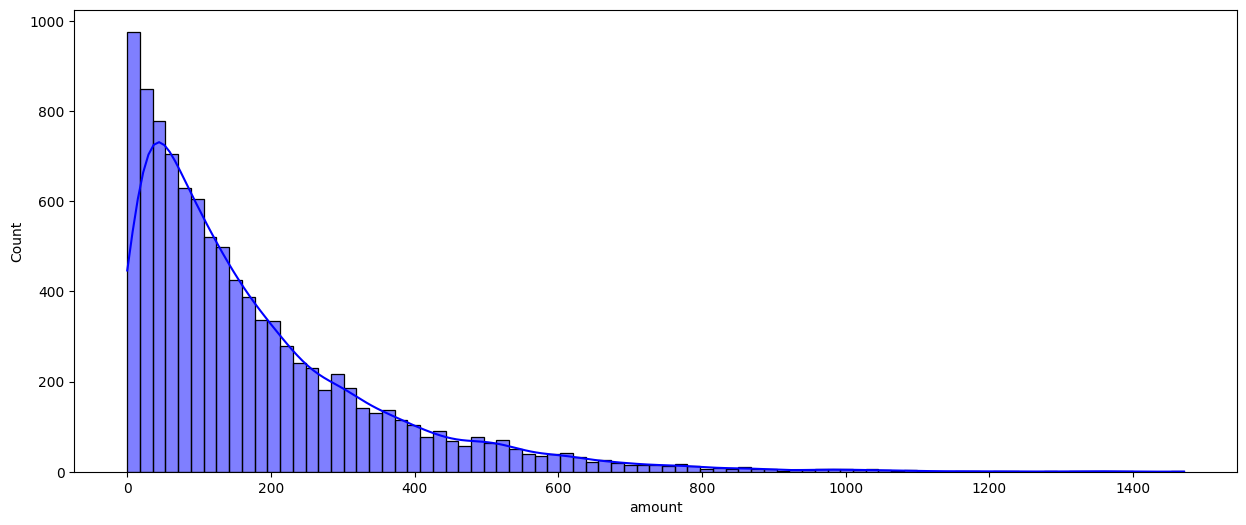

In [12]:
# Visualize the distribution of transaction amounts using a histogram with KDE
plt.figure(figsize=(15,6))
sns.histplot(df['amount'],kde=True,color='blue')

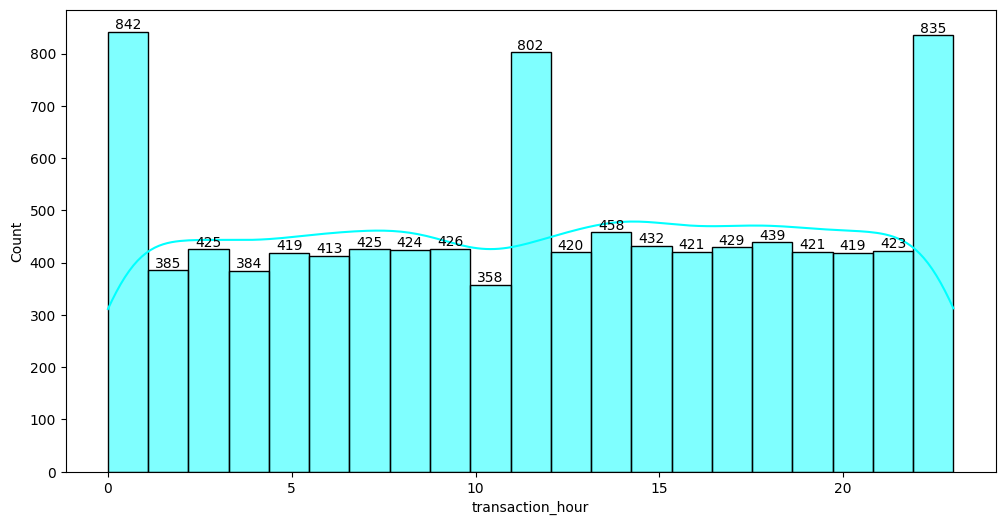

In [13]:
# Visualize the distribution of transaction hours using a histogram with KDE and count labels
plt.figure(figsize=(12,6))
ax = sns.histplot(df['transaction_hour'],color='cyan',kde=True)

for container in ax.containers:
    ax.bar_label(container)

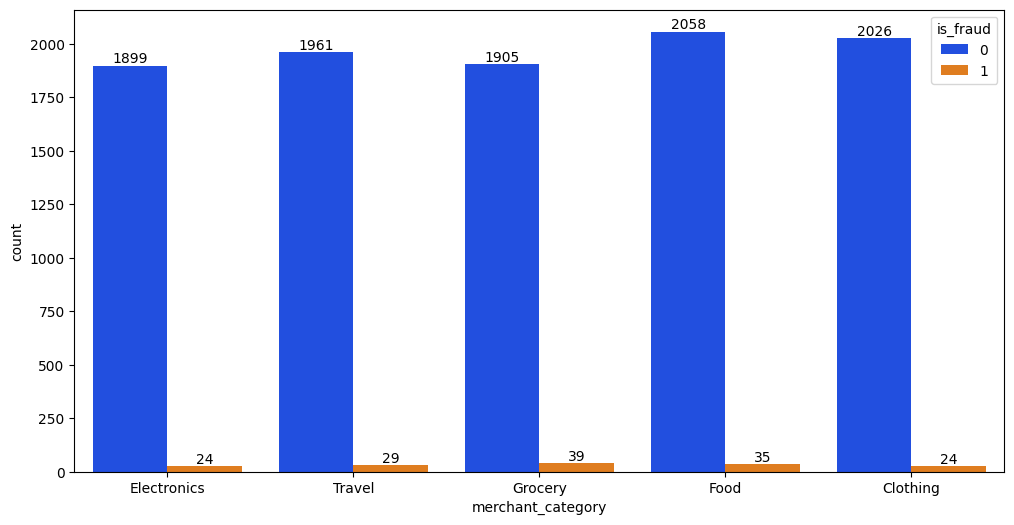

In [14]:
# Visualize fraud vs non-fraud transaction counts across different merchant categories
plt.figure(figsize=(12,6))
ax = sns.countplot(x=df['merchant_category'],hue=df['is_fraud'],palette='bright')

for container in ax.containers:
    ax.bar_label(container)

In [15]:
# Calculate the total transaction amount for each merchant category
df.groupby('merchant_category').sum()['amount']

merchant_category
Clothing       360831.73
Electronics    343459.45
Food           363830.85
Grocery        343552.61
Travel         347823.85
Name: amount, dtype: float64

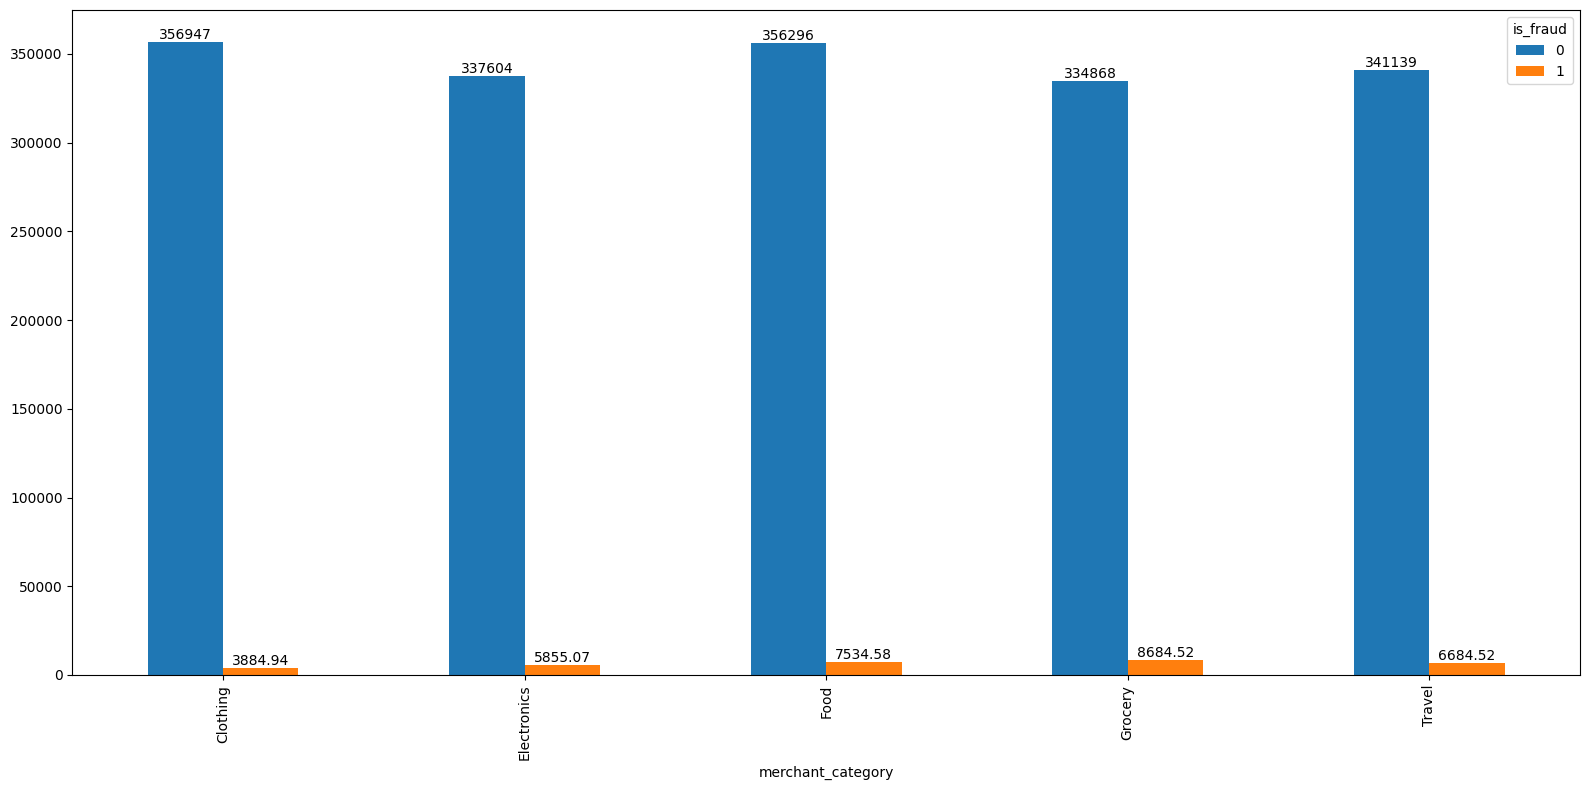

In [16]:
# Compare total transaction amounts by merchant category for fraud and non-fraud cases
fig, ax = plt.subplots(figsize=(16, 8))

ax = df.pivot_table(values='amount',
    index='merchant_category',
    columns='is_fraud',
    aggfunc='sum'
).plot(kind='bar', ax=ax)

for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

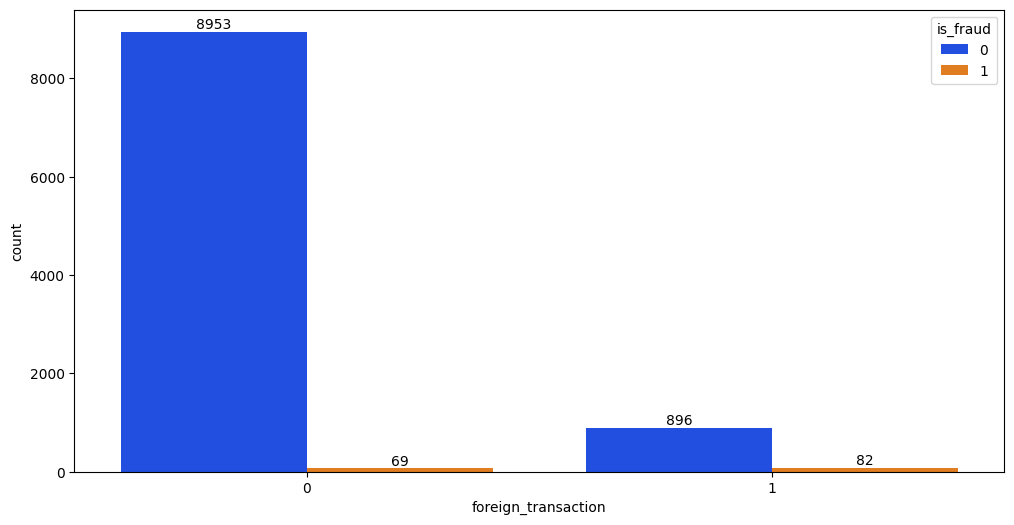

In [17]:
# Visualize fraud vs non-fraud transaction counts for foreign and domestic transactions
plt.figure(figsize=(12,6))
ax = sns.countplot(x=df['foreign_transaction'],hue=df['is_fraud'],palette='bright')

for container in ax.containers:
    ax.bar_label(container)

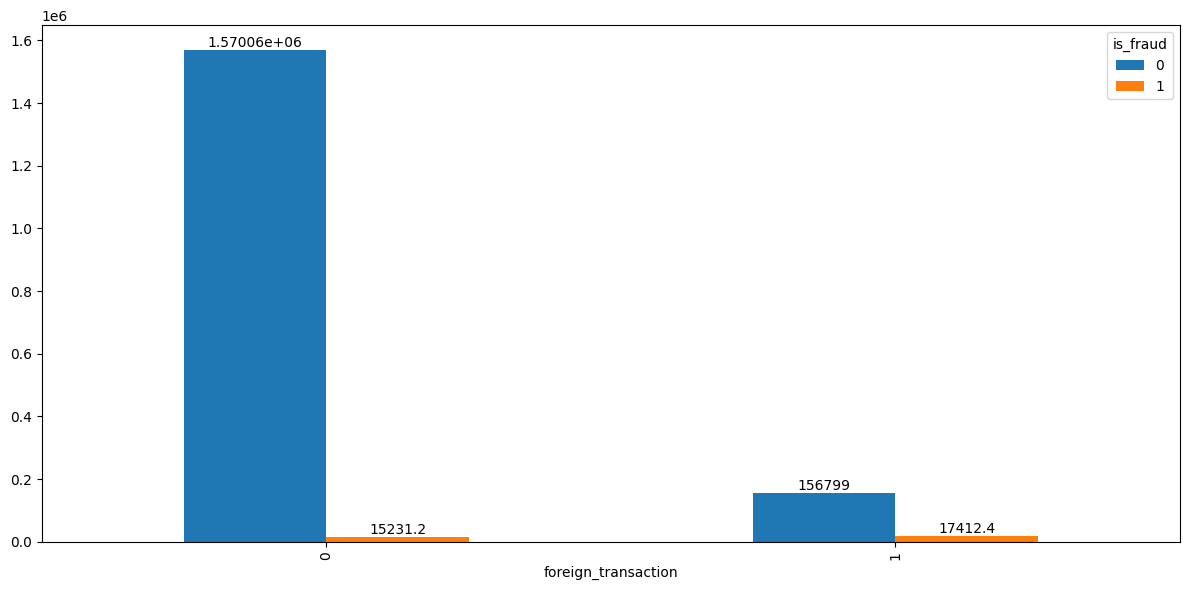

In [18]:
# Visualize fraud vs non-fraud transaction counts for foreign and domestic transactions
fig, ax = plt.subplots(figsize=(12, 6))
ax = df.pivot_table(values='amount',
    index='foreign_transaction',
    columns='is_fraud',aggfunc='sum').plot(kind='bar',ax=ax)

for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

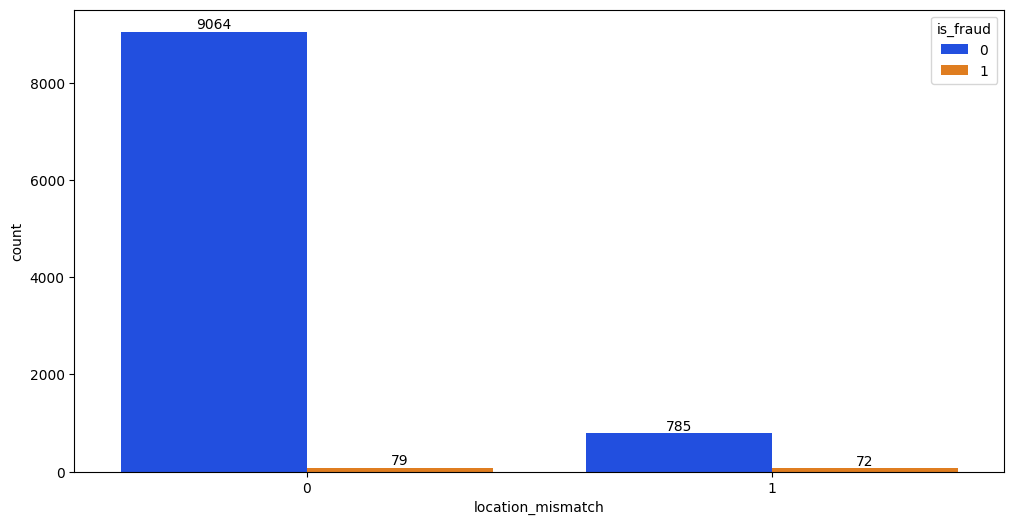

In [19]:
# Visualize fraud vs non-fraud transaction counts based on location mismatch status
plt.figure(figsize=(12,6))
ax = sns.countplot(x=df['location_mismatch'],hue=df['is_fraud'],palette='bright')

for container in ax.containers:
    ax.bar_label(container)

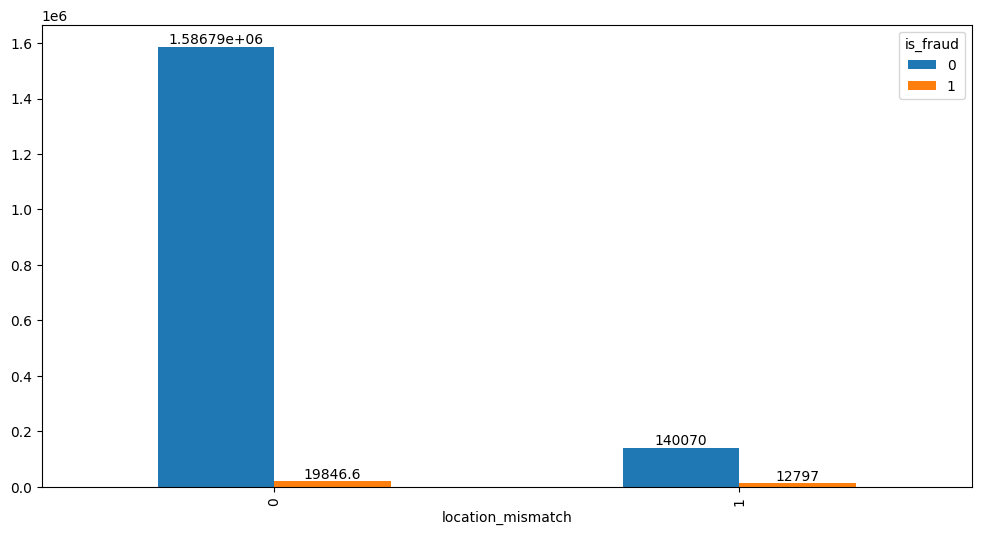

In [20]:
# Visualize fraud vs non-fraud transaction counts based on location mismatch status
fig,ax = plt.subplots(figsize=(12,6))
ax = df.pivot_table(values='amount',
    index='location_mismatch',
    columns='is_fraud',aggfunc='sum').plot(kind='bar',ax=ax)

for container in ax.containers:
    ax.bar_label(container)

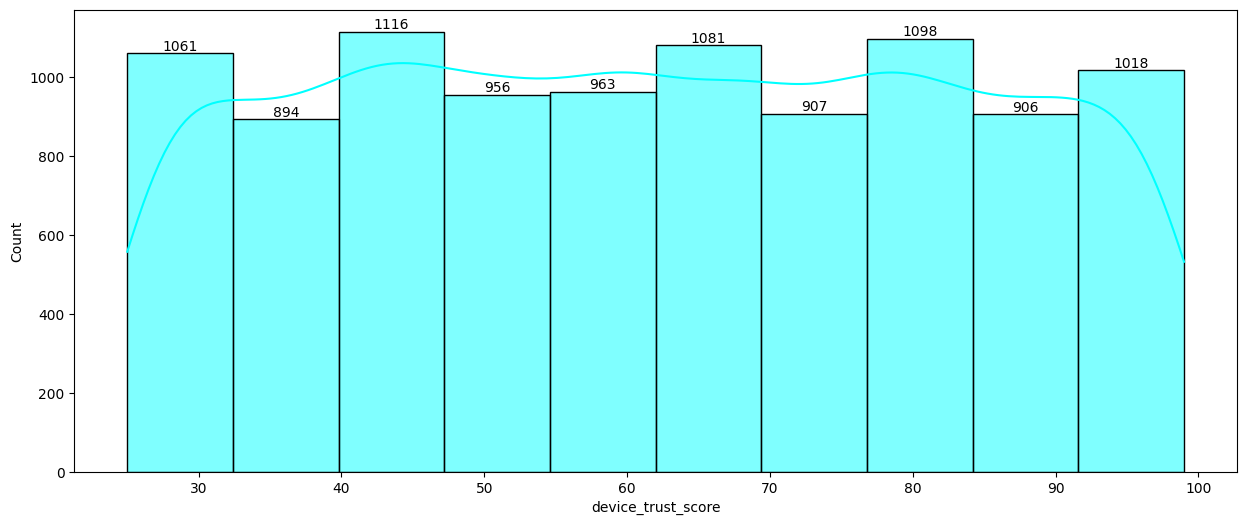

In [21]:
# Visualize the distribution of device trust scores with frequency annotations
plt.figure(figsize=(15,6))
ax = sns.histplot(df['device_trust_score'],bins=10,color='cyan',kde=True)

for container in ax.containers:
    ax.bar_label(container)

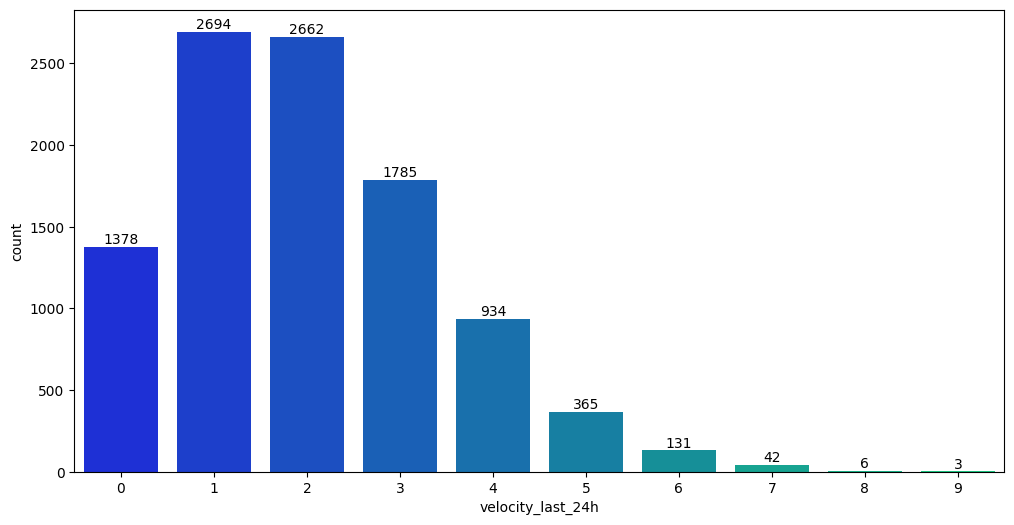

In [22]:
# Visualize the frequency of transactions grouped by velocity in the last 24 hours
plt.figure(figsize=(12,6))
ax = sns.countplot(x=df['velocity_last_24h'],palette='winter')

for container in ax.containers:
    ax.bar_label(container)

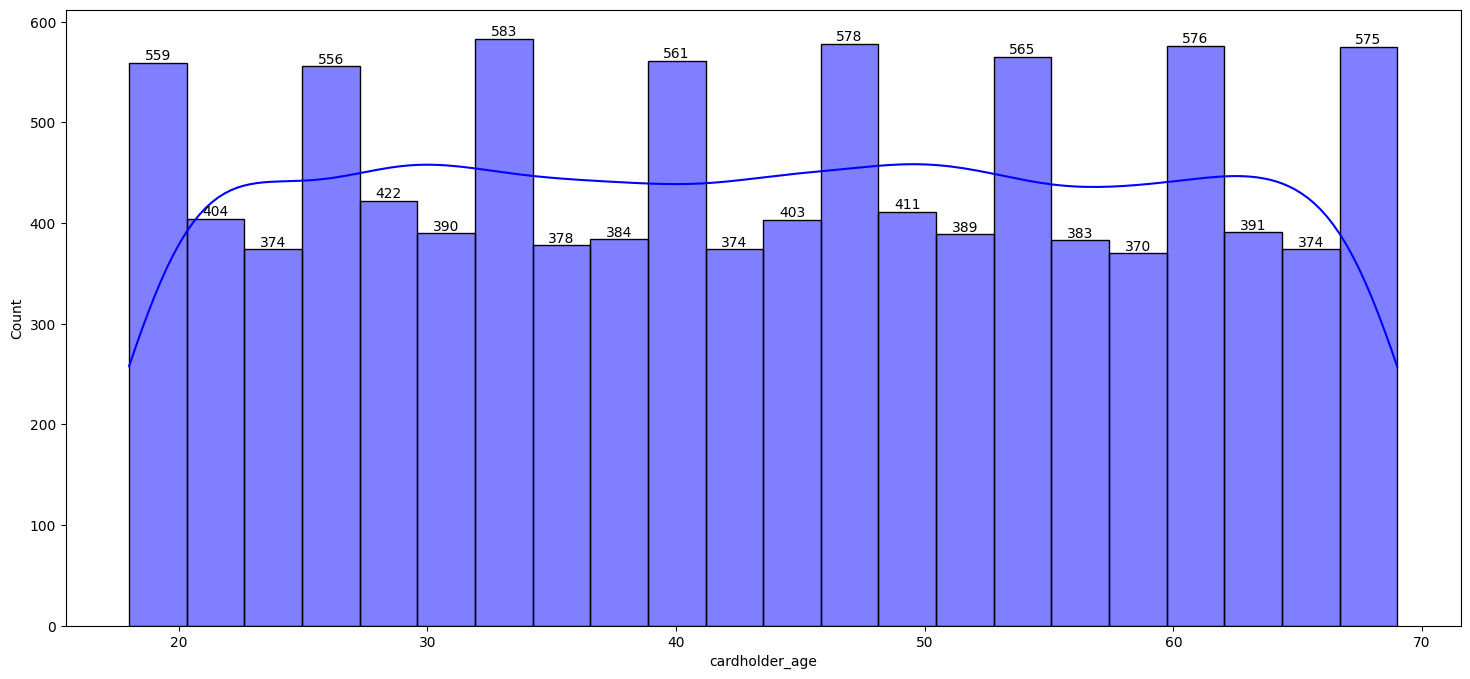

In [23]:
# Visualize the distribution of cardholder ages with frequency annotations
plt.figure(figsize=(18,8))
ax = sns.histplot(df['cardholder_age'],color='blue',kde=True)

for container in ax.containers:
    ax.bar_label(container)

In [24]:
# Categorize cardholder ages into defined age groups for easier analysis
df['age_group'] = pd.cut(df['cardholder_age'], bins = [20, 30, 40, 50, 60, 100], labels=['20-30', '30-40', '40-50', '50-60', '60+'])

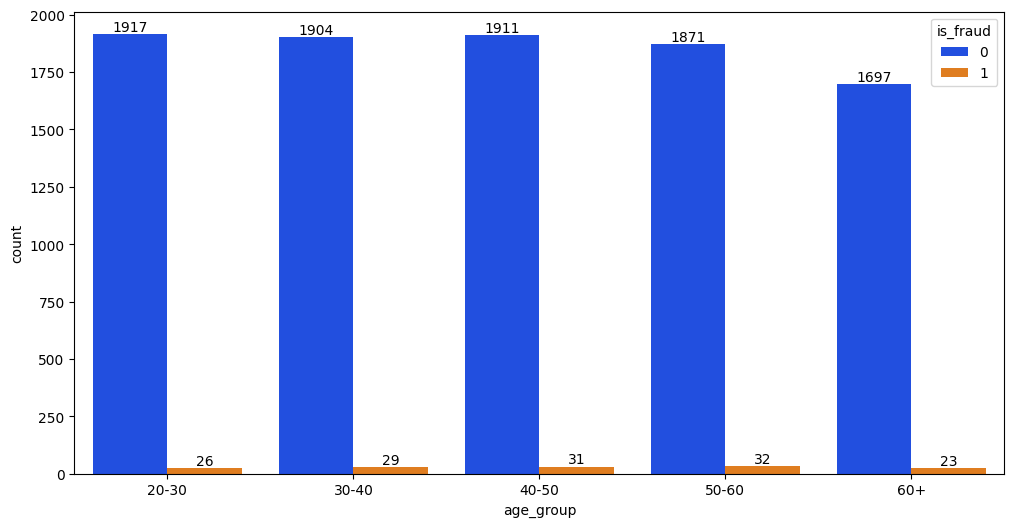

In [25]:
# Visualize the distribution of age groups by fraud status with annotated counts
plt.figure(figsize=(12,6))
ax = sns.countplot(x=df['age_group'],hue=df['is_fraud'],palette='bright')

for container in ax.containers:
    ax.bar_label(container)

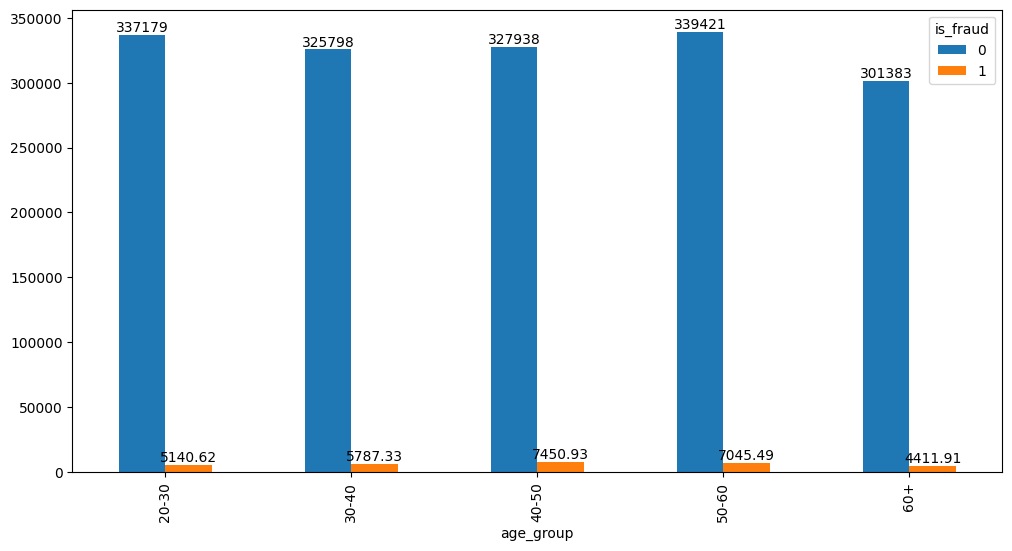

In [26]:
# Create a bar plot showing total transaction amounts by age group and fraud status, with labeled bars
fig,ax = plt.subplots(figsize=(12,6))
ax = df.pivot_table(values='amount',
              index='age_group',
              columns='is_fraud',aggfunc='sum').plot(kind='bar',ax=ax)

for container in ax.containers:
    ax.bar_label(container)

In [27]:
# Create a new column 'high_amount' that flags transactions over 800 as 1, others as 0
df['high_amount'] = (df['amount'] > 800).astype(int)

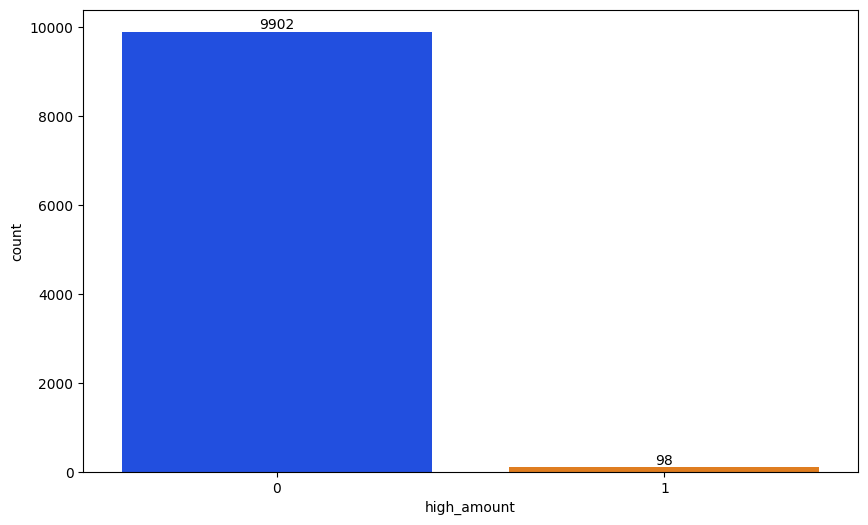

In [28]:
# Plot a bar chart of the counts of high vs low amount transactions with labeled bars
plt.figure(figsize=(10,6))
ax = sns.barplot(df['high_amount'].value_counts(),palette='bright')

for container in ax.containers:
    ax.bar_label(container)

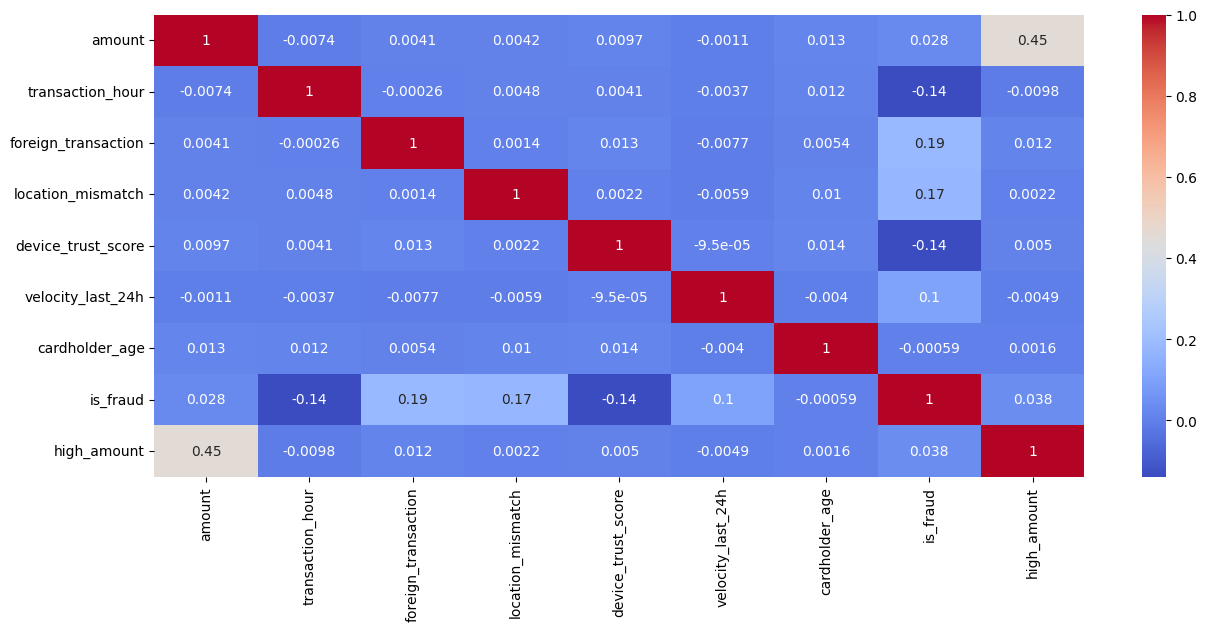

In [29]:
# Display a heatmap of the correlation matrix for numeric columns with annotations and a coolwarm color map
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

In [30]:
df.drop(columns=['age_group','high_amount'], inplace=True, errors='ignore')

# Feature Engineering

In [31]:
df.head()

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,84.47,22,Electronics,0,0,66,3,40,0
1,541.82,3,Travel,1,0,87,1,64,0
2,237.01,17,Grocery,0,0,49,1,61,0
3,164.33,4,Grocery,0,1,72,3,34,0
4,30.53,15,Food,0,0,79,0,44,0


In [32]:
df_encoded = df.copy()

In [33]:
df_encoded.head()

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,84.47,22,Electronics,0,0,66,3,40,0
1,541.82,3,Travel,1,0,87,1,64,0
2,237.01,17,Grocery,0,0,49,1,61,0
3,164.33,4,Grocery,0,1,72,3,34,0
4,30.53,15,Food,0,0,79,0,44,0


In [34]:
import sklearn

In [35]:
# Encode categorical columns 'merchant_category' and 'age_group' into numeric labels using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_encoded['merchant_category'] = le.fit_transform(df_encoded['merchant_category'])

In [36]:
df_encoded.head()

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,84.47,22,1,0,0,66,3,40,0
1,541.82,3,4,1,0,87,1,64,0
2,237.01,17,3,0,0,49,1,61,0
3,164.33,4,3,0,1,72,3,34,0
4,30.53,15,2,0,0,79,0,44,0


In [37]:
# Split the dataset into features (X) and target variable (y) for model training
X = df_encoded.drop('is_fraud',axis=1)
y = df_encoded['is_fraud']

In [38]:
X.head()

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age
0,84.47,22,1,0,0,66,3,40
1,541.82,3,4,1,0,87,1,64
2,237.01,17,3,0,0,49,1,61
3,164.33,4,3,0,1,72,3,34
4,30.53,15,2,0,0,79,0,44


In [39]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [40]:
# Apply SMOTE to balance the dataset by oversampling the minority class in X and y
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

In [41]:
# Check the class distribution after SMOTE to confirm that the classes are balanced
y_resampled.value_counts()

is_fraud
0    9849
1    9849
Name: count, dtype: int64

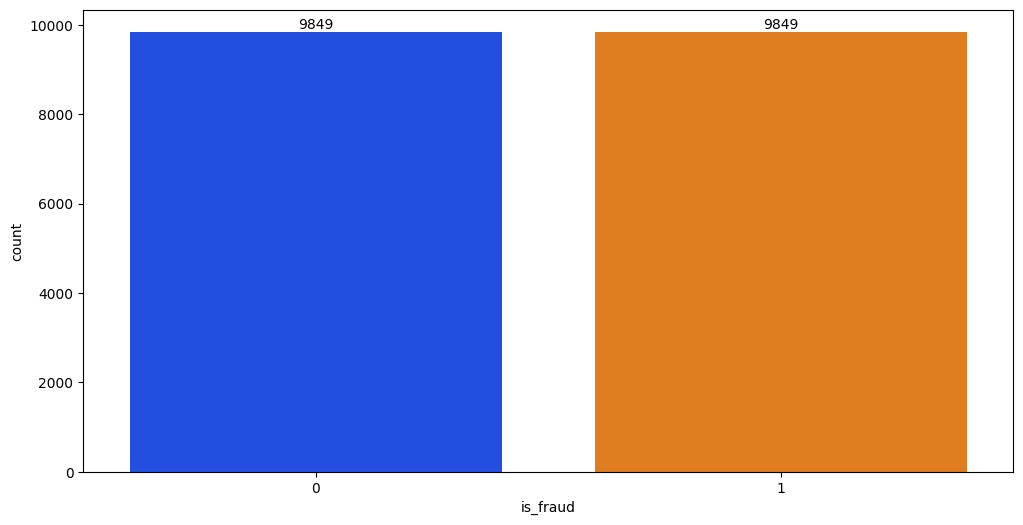

In [42]:
# Visualize the balanced class distribution after SMOTE with a count plot and labeled bars
plt.figure(figsize=(12,6))
ax = sns.countplot(x=y_resampled,palette='bright')

for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [43]:
# Standardize the features by scaling them to have mean 0 and standard deviation 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_resampled)

In [44]:
# Split the scaled data into training and testing sets with 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_resampled,test_size=0.2,random_state=42)

In [45]:
df_encoded.head()

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,84.47,22,1,0,0,66,3,40,0
1,541.82,3,4,1,0,87,1,64,0
2,237.01,17,3,0,0,49,1,61,0
3,164.33,4,3,0,1,72,3,34,0
4,30.53,15,2,0,0,79,0,44,0


# Building Model

In [46]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [47]:
# Feedforward neural network with input, hidden, and softmax output layers
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    # ✅ FIXED OUTPUT LAYER (Binary)
    Dense(1, activation='sigmoid')
])


In [48]:
# Compile the model with Adam optimizer, sparse categorical cross-entropy loss, and accuracy metric
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [49]:
# Training the Neural Network
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8950 - loss: 0.2525 - val_accuracy: 0.9235 - val_loss: 0.1990
Epoch 2/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9265 - loss: 0.1892 - val_accuracy: 0.9248 - val_loss: 0.1952
Epoch 3/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9298 - loss: 0.1770 - val_accuracy: 0.9327 - val_loss: 0.1812
Epoch 4/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9359 - loss: 0.1678 - val_accuracy: 0.9302 - val_loss: 0.1783
Epoch 5/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9387 - loss: 0.1614 - val_accuracy: 0.9321 - val_loss: 0.1751
Epoch 6/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9421 - loss: 0.1555 - val_accuracy: 0.9375 - val_loss: 0.1682
Epoch 7/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9406 - loss: 0.1517 - val_accuracy: 0.9375 - val_loss: 0.1659
Epoch 8/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9440 - loss: 0.1477 - val_accuracy: 0.

In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

# Evaluate Model

In [51]:
# Evaluate the model on test data and print test accuracy and loss
test_loss,test_acc = model.evaluate(X_test,y_test)
print('Test Accuracy', test_acc)
print('Test Loss', test_loss)

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9655 - loss: 0.1004
Test Accuracy 0.965482234954834
Test Loss 0.10035651922225952


In [52]:
# Make predictions on test data and display the first 5 results
predictions = model.predict(X_test)
print(predictions[:5])

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[1.2825651e-25]
 [9.7974461e-01]
 [9.9995679e-01]
 [9.6357656e-01]
 [0.0000000e+00]]


In [53]:
# Get predicted probabilities
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
[[1892  122]
 [  14 1912]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      2014
           1       0.94      0.99      0.97      1926

    accuracy                           0.97      3940
   macro avg       0.97      0.97      0.97      3940
weighted avg       0.97      0.97      0.97      3940

ROC-AUC Score: 0.9905162821825622


# Saving Model

In [54]:
model.save("fraud_detection_model.keras")

In [55]:
import pickle
pickle.dump(scaler, open("scaler.pkl","wb"))